Using TensorFlow backend.
C:\Users\97252\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\97252\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\97252\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\97252\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py



> 90.233
> 90.808
> 91.008
> 90.825
> 91.225


C:\Users\97252\Anaconda3\lib\site-packages\ipykernel_launcher.py:76: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\97252\Anaconda3\lib\site-packages\ipykernel_launcher.py:81: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


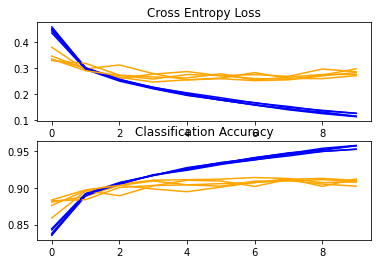

Accuracy: mean=90.820 std=0.330, n=5


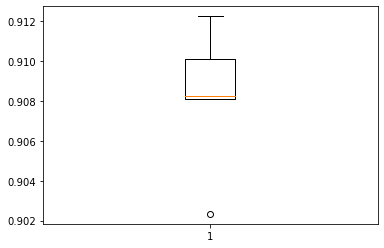

In [1]:
# baseline cnn model for fashion mnist

from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD

# load train and test dataset
def load_dataset():
    # load dataset
    (trainX, trainY), (testX, testY) = fashion_mnist.load_data()
    # reshape dataset to have a single channel
    trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
    testX = testX.reshape((testX.shape[0], 28, 28, 1))
    # one hot encode target values
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    return trainX, trainY, testX, testY

# scale pixels
def prep_pixels(train, test):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm, test_norm

# define cnn model

def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(lr=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# evaluate a model using k-fold cross-validation

def evaluate_model(dataX, dataY, n_folds=5):
    scores, histories = list(), list()
    # prepare cross validation
    kfold = KFold(n_folds, shuffle=True, random_state=1)
    # enumerate splits
    for train_ix, test_ix in kfold.split(dataX):
        # define model
        model = define_model()
        # select rows for train and test
        trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
        # fit model
        history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
        # evaluate model
        _, acc = model.evaluate(testX, testY, verbose=0)
        print('> %.3f' % (acc * 100.0))
        # append scores
        scores.append(acc)
        histories.append(history)
    return scores, histories

# plot diagnostic learning curves

def summarize_diagnostics(histories):
    for i in range(len(histories)):
        # plot loss
        pyplot.subplot(211)
        pyplot.title('Cross Entropy Loss')
        pyplot.plot(histories[i].history['loss'], color='blue', label='train')
        pyplot.plot(histories[i].history['val_loss'], color='orange', label='test')
        # plot accuracy
        pyplot.subplot(212)
        pyplot.title('Classification Accuracy')
        pyplot.plot(histories[i].history['accuracy'], color='blue', label='train')
        pyplot.plot(histories[i].history['val_accuracy'], color='orange', label='test')
    pyplot.show()

# summarize model performance

def summarize_performance(scores):
    # print summary
    print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
    # box and whisker plots of results
    pyplot.boxplot(scores)
    pyplot.show()

# run the test harness for evaluating a model

def run_test_harness():
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    trainX, testX = prep_pixels(trainX, testX)
    # evaluate model
    scores, histories = evaluate_model(trainX, trainY)
    # learning curves
    summarize_diagnostics(histories)
    # summarize estimated performance
    summarize_performance(scores)

# entry point, run the test harness
run_test_harness()

In [1]:
import keras
from keras.datasets import fashion_mnist

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Using TensorFlow backend.
C:\Users\97252\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\97252\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\97252\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\97252\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [4]:
x_train_prep = x_train / 255
x_test_prep = x_test / 255

x_train_prep_1d = x_train_prep.reshape(-1, 28 * 28)
x_test_prep_1d = x_test_prep.reshape(-1, 28 * 28)

x_train_prep_3d = x_train_prep.reshape(-1, 28, 28, 1)
x_test_prep_3d = x_test_prep.reshape(-1, 28, 28, 1)

In [ ]:
# PREDICTION BY ALGORITHMS:
# KNeighbors, DecisionTree, RandomForest
#BONUS: CROSS VALIDATION!!!

from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

#from sklearn.cross_validation import cross_val_score

classifiers = [
    KNeighborsClassifier(10),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    #AdaBoostClassifier(),
    #GradientBoostingClassifier()
    ]
for classifier in classifiers:
    model = classifier.fit(X_train, y_train)
    print("\n The Classifier is \n " +str(classifier))
    print("\n The Model's Score is %.3f" % model.score(Xa_test, ya_test))
    y_pred_best = model.predict(Xa_test)
    
  #  cm=confusion_matrix(ya_test, y_pred_best, labels=None, sample_weight=None)
  #  print(cm)
    
    #cross validation
    print(classification_report(ya_test,y_pred_best))
    if (str(classifier) == 'KNeighborsClassifier(n_neighbors=10)'):  #CROSS VALIDATION! activate only KNN
        score= cross_val_score(classifier, X_train, y_train, cv=4)
        print(score)
        
#    print(cross_val_score(lr, X, y, cv=2))
    #sns.heatmap(pd.DataFrame(classification_report).iloc[:-1, :].T, annot=True)


 The Classifier is 
 KNeighborsClassifier(n_neighbors=3)


In [4]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix

In [6]:
import heapq
from sklearn.metrics import classification_report

target_names = ['0','1', '2', '3','4', '5','6','7','8','9']

def analyze_model(model, x, y, inspect_n=10):
    y_pred = model.predict(x)
    print("0- T-shirt/top, 1- Trouser, 2- Pullover, 3- Dress, 4- Coat, 5- Sandal, 6- Shirt, 7- Sneaker, 8- Bag, 9- Ankle Boot")
    print('')
    print(classification_report(y, y_pred, target_names=target_names))
    conf_matrix = confusion_matrix(y, y_pred)
    print('Confusion matrix:')
    print(conf_matrix)
    print('')
    for _ in range(10): #10 labels
        conf_matrix[_][_] = 0
    conf_matrix_flat = conf_matrix.reshape(-1, 1)
    biggest_indices = heapq.nlargest(inspect_n, range(len(conf_matrix_flat)), conf_matrix_flat.take)
    biggest_indices = np.unravel_index(biggest_indices, conf_matrix.shape)
    highest_values = conf_matrix[biggest_indices]  

In [ ]:
from sklearn.naive_bayes import GaussianNB

#Naive Bayes algorithm

naive_bayes = GaussianNB()
print(np.mean(cross_val_score(estimator=naive_bayes, cv=4, scoring='accuracy', X=x_train_prep_1d, y=y_train)))
naive_bayes.fit(x_train_prep_1d, y_train)

In [ ]:
analyze_model(naive_bayes, x_test_prep_1d, y_test)

In [ ]:
#Random Forest Algorithm

from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=1)
rf_param_grid = {'max_depth': [3, 3, 3, 3], 
                 'max_features': ['auto', 'log2', 0.15, None]}
rf_gridsearch = GridSearchCV(cv=4, estimator=random_forest, param_grid=rf_param_grid, scoring='accuracy', n_jobs=1)
rf_gridsearch.fit(x_train_prep_1d, y_train)

In [ ]:
print(rf_gridsearch.best_params_)
print('')
print(rf_gridsearch.best_score_)

In [ ]:
analyze_model(rf_gridsearch, x_test_prep_1d, y_test)

Fitting ExtraTreesClassifier on Fashion Mnist data with 1 cores...
done in 6.884s
IMPORTANCE BY COLOR SCALE: THE LIGHTER-> THE MORE IMPORTANT. 



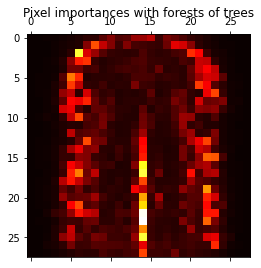

In [7]:
#pixel importance by ExtraTreesClassifier

import tensorflow as tf

from time import time
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
 
# Number of cores to use to perform parallel fitting of the forest model
n_jobs = 1
 
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

# Load the Fashion Mnist dataset

data = fashion_mnist
X = train_images.reshape((len(train_images), -1))
y = train_labels
 
mask = y < 5  # Limit to 5 classes
X = X[mask]
y = y[mask]
 
# Build a forest and compute the pixel importances

print("Fitting ExtraTreesClassifier on Fashion Mnist data with %d cores..." % n_jobs)
t0 = time()
forest = ExtraTreesClassifier(n_estimators=50,
                              max_features=20,
                              n_jobs=n_jobs,
                              random_state=0)
 
forest.fit(X, y)

print("done in %0.3fs" % (time() - t0))
importances = forest.feature_importances_
importances = importances.reshape(train_images[0].shape)
 
print( "IMPORTANCE BY COLOR SCALE: THE LIGHTER-> THE MORE IMPORTANT. ")
print('')
# Plot pixel importances

plt.matshow(importances, cmap=plt.cm.hot)
plt.title("Pixel importances with forests of trees")
plt.show()